# Введение в анализ данных

Этот проект представляет собой введение в анализ данных с использованием популярных библиотек Python, таких как `pandas`, `numpy`, `sklearn`, `lightgbm`, `scipy`, `statsmodels`, `matplotlib` и `seaborn`. В проекте рассматриваются основные этапы анализа данных, начиная от загрузки данных и заканчивая построением и оценкой моделей машинного обучения.

P.S. В этом проекте мы рассмотрели основные этапы анализа данных, начиная от загрузки и предварительной обработки данных, заканчивая построением и оценкой моделей машинного обучения. Мы также сравнили несколько моделей и определили, какая из них показала наилучшие результаты.


In [ ]:
#!pip install pandas numpy scikit-learn lightgbm scipy statsmodels matplotlib seaborn


In [ ]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import lightgbm as lgb
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#### Загрузка данных

Для начала работы необходимо импортировать необходимые библиотеки и загрузить данные с Kaggle. В данном проекте используются данные из таблицы `train.json`.

In [ ]:
train = pd.read_json('data/train.json')



In [ ]:
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [ ]:
test = pd.read_json('data/test.json')


#### Размер данных

In [ ]:
train.size

740280

In [ ]:
train.columns.to_list()

['bathrooms',
 'bedrooms',
 'building_id',
 'created',
 'description',
 'display_address',
 'features',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'price',
 'street_address',
 'interest_level']

*Целевой переменной является столбец price*

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


*Этот метод выводит информацию о DataFrame, включая тип индекса и столбцы, ненулевые значения и использование памяти.*

In [ ]:
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


*Метод вычисляет статистики*

In [ ]:
train.corr(numeric_only=True)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


*Метод вычисляет попарную корреляцию столбцов, исключая значения NA/null.*

In [ ]:
train.drop(columns=['building_id',
 'created',
 'description',
 'display_address',
 'features',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'street_address'], inplace=True)

In [ ]:
train

,bathrooms,bedrooms,price,interest_level
4,1.0,1,2400,medium
6,1.0,2,3800,low
9,1.0,2,3495,medium
10,1.5,3,3000,medium
15,1.0,0,2795,low
...,...,...,...,...
124000,1.0,3,2800,low
124002,1.0,2,2395,medium
124004,1.0,1,1850,medium
124008,1.0,2,4195,medium


## Статистический анализ данных
### Анализ цели

<Axes: >

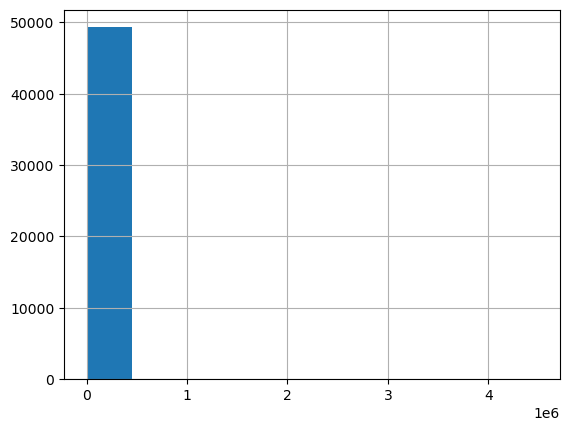

In [ ]:
data_frame = pd.DataFrame(train)
data_frame = data_frame.reindex(columns=['bathrooms', 'bedrooms', 'interest_level', 'price'])
data_frame['price'].hist()

<Axes: >

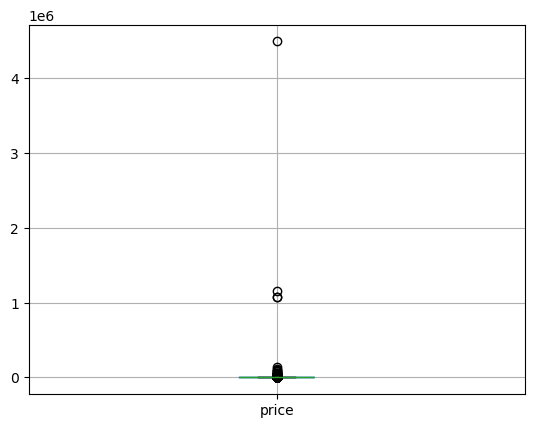

In [ ]:
data_frame.boxplot(column='price')

*На графики видна только медиана и при этом не отображается коробка, из чего можно сделать вывод, что данные не имеют большого разброса, а выбросы которые есть в данных портят визуализацию на гистограмме и боксплоте*

In [ ]:
data_frame

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


In [ ]:
q1 = data_frame['price'].quantile(0.01)
q99 = data_frame['price'].quantile(0.99)

df_filtered = data_frame.drop(data_frame[(data_frame['price'] < q1) | (data_frame['price'] > q99)].index)
df_filtered

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


<Axes: >

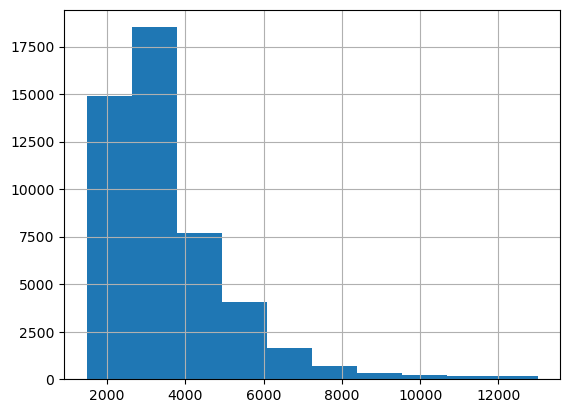

In [ ]:
df_filtered['price'].hist()

*После удаления выбросов данные смогли прийти к нормальному распределению*

### Анализ характеристик


In [ ]:
df_filtered.dtypes

bathrooms         float64
bedrooms            int64
interest_level     object
price               int64
dtype: object

*interest_level имеет тип object. Столбцы со смешенными типа сохарняются с dtype object*

In [ ]:
df_filtered['interest_level'].value_counts()

interest_level
low       33697
medium    11116
high       3566
Name: count, dtype: int64

In [ ]:
label_endoing = LabelEncoder()
df_filtered['interest_level'] = label_endoing.fit_transform(df_filtered['interest_level'])
df_filtered

,bathrooms,bedrooms,interest_level,price
4,1.0,1,2,2400
6,1.0,2,1,3800
9,1.0,2,2,3495
10,1.5,3,2,3000
15,1.0,0,1,2795
...,...,...,...,...
124000,1.0,3,1,2800
124002,1.0,2,2,2395
124004,1.0,1,2,1850
124008,1.0,2,2,4195


<Axes: >

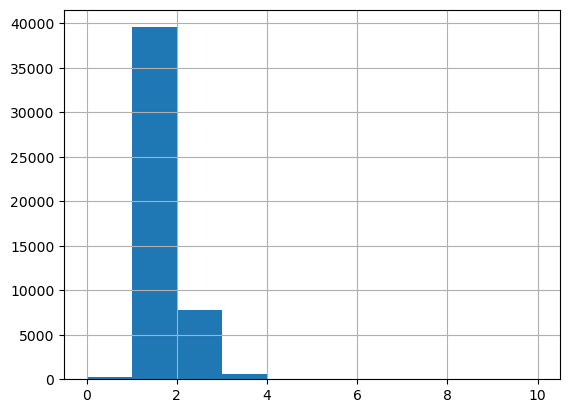

In [ ]:
df_filtered['bathrooms'].hist()

<Axes: >

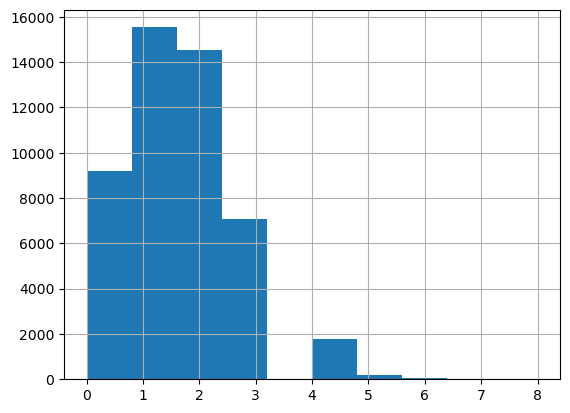

In [ ]:
df_filtered['bedrooms'].hist()

*Присутствуют выбросы* 

### Комплексный анализ

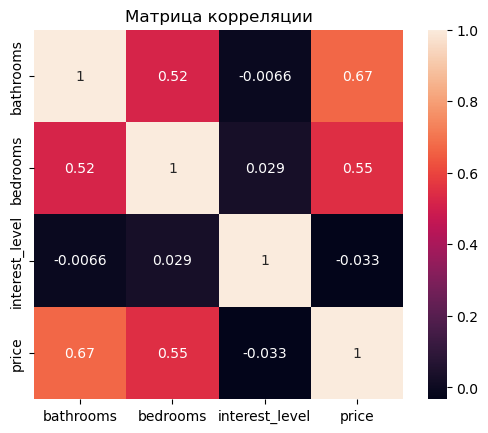

In [ ]:
corr_matrix = df_filtered.corr()

sns.heatmap(corr_matrix, annot=True, square=True)
plt.title('Матрица корреляции')
plt.show()

<Axes: xlabel='price', ylabel='bathrooms'>

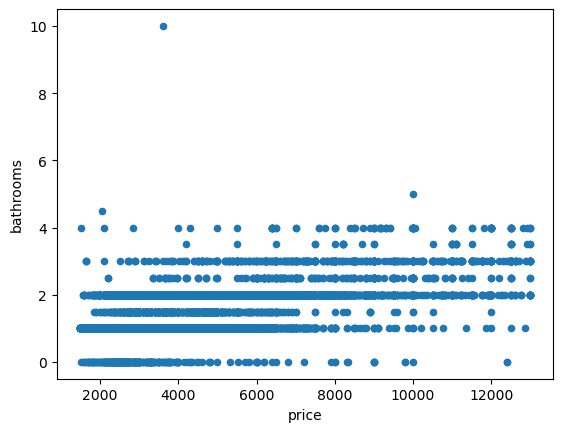

In [ ]:
df_filtered.plot.scatter(x='price', y='bathrooms')

<Axes: xlabel='price', ylabel='bedrooms'>

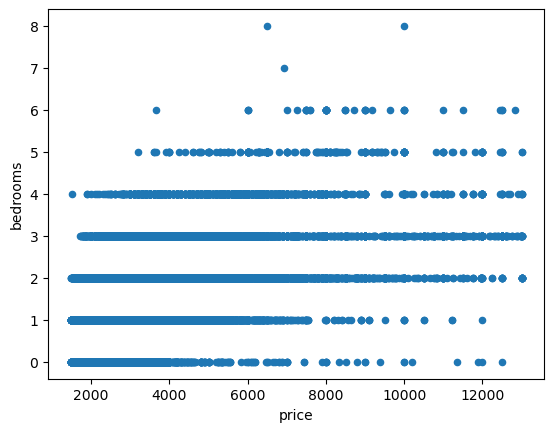

In [ ]:
df_filtered.plot.scatter(x='price', y='bedrooms')

<Axes: xlabel='price', ylabel='interest_level'>

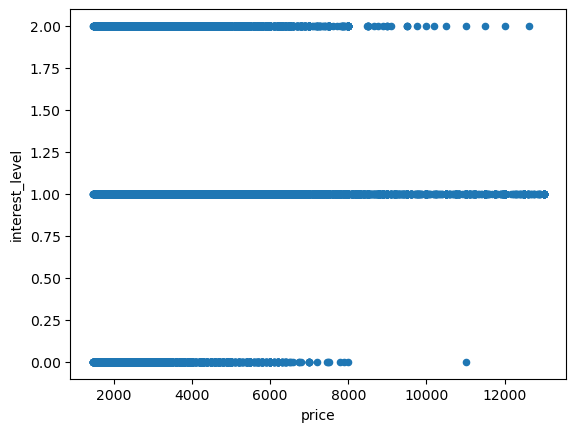

In [ ]:
df_filtered.plot.scatter(x='price', y='interest_level')

## Создание признаков

In [ ]:
df_filtered['bathrooms_squared'] = df_filtered['bathrooms'] ** 2
df_filtered['bedrooms_squared'] = df_filtered['bedrooms'] ** 2
df_filtered['interest_level_squared'] = df_filtered['interest_level'] ** 2
df_filtered


,bathrooms,bedrooms,interest_level,price,bathrooms_squared,bedrooms_squared,interest_level_squared
4,1.0,1,2,2400,1.00,1,4
6,1.0,2,1,3800,1.00,4,1
9,1.0,2,2,3495,1.00,4,4
10,1.5,3,2,3000,2.25,9,4
15,1.0,0,1,2795,1.00,0,1
...,...,...,...,...,...,...,...
124000,1.0,3,1,2800,1.00,9,1
124002,1.0,2,2,2395,1.00,4,4
124004,1.0,1,2,1850,1.00,1,4
124008,1.0,2,2,4195,1.00,4,4


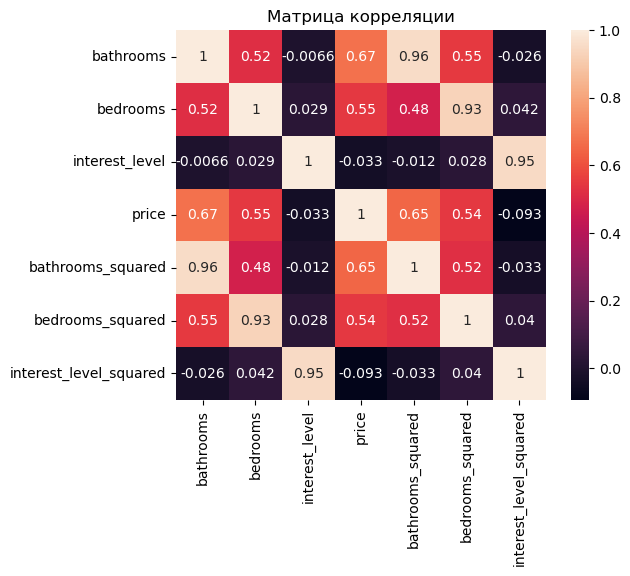

In [ ]:
corr_matrix = df_filtered.corr()

sns.heatmap(corr_matrix, annot=True, square=True)
plt.title('Матрица корреляции')
plt.show()

*Базовые признаки имеют более хорошую корреляцию*

In [ ]:
X_train = train[['bathrooms', 'bedrooms']]
X_test = test[['bathrooms', 'bedrooms']]
y_train = train['price']
y_test = test['price']

In [ ]:
poly = PolynomialFeatures(10)
poly_train = poly.fit_transform(X_train)
poly_test = poly.transform(X_test)


## Модели

In [ ]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

### Линейная регрессия


In [ ]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
y_train_pred_lr = linreg_model.predict(X_train)
y_test_pred_lr = linreg_model.predict(X_test)



In [ ]:
mae_train_lr = metrics.mean_absolute_error(y_train, y_train_pred_lr)
mae_test_lr = metrics.mean_absolute_error(y_test, y_test_pred_lr)
rmse_train_lr = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lr))
rmse_test_lr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr))

In [ ]:
result_MAE = pd.concat([result_MAE, pd.DataFrame({'model': ['linear_regression'], 'train': [mae_train_lr], 'test': [mae_test_lr]})])
result_RMSE = pd.concat([result_RMSE, pd.DataFrame({'model': ['linear_regression'], 'train': [rmse_train_lr], 'test': [rmse_test_lr]})])

/tmp/ipykernel_4635/721340189.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_MAE = pd.concat([result_MAE, pd.DataFrame({'model': ['linear_regression'], 'train': [mae_train_lr], 'test': [mae_test_lr]})])
/tmp/ipykernel_4635/721340189.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_RMSE = pd.concat([result_RMSE, pd.DataFrame({'model': ['linear_regression'], 'train': [rmse_train_lr], 'test': [rmse_test_lr]})])


### Решающие деревья


In [ ]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_train_pred_tr = tree_model.predict(X_train)
y_test_pred_tr = tree_model.predict(X_test)


In [ ]:
mae_train_tr = metrics.mean_absolute_error(y_train, y_train_pred_tr)
mae_test_tr = metrics.mean_absolute_error(y_test, y_test_pred_tr)
rmse_train_tr = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_tr))
rmse_test_tr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_tr))

In [ ]:
result_MAE = pd.concat([result_MAE, pd.DataFrame({'model': ['Destree_regressor'], 'train': [mae_train_tr], 'test': [mae_test_tr]})])
result_RMSE = pd.concat([result_RMSE, pd.DataFrame({'model': ['Destree_regressor'], 'train': [rmse_train_tr], 'test': [rmse_test_tr]})])

### Нативные модели

In [ ]:
mean_train = np.mean(y_train)
mean_test = np.mean(y_test)
median_train = np.median(y_train)
median_test = np.median(y_test)

In [ ]:
mae_native_mean_train = metrics.mean_absolute_error(y_train, [mean_train]*len(y_train))
mae_native_mean_test = metrics.mean_absolute_error(y_test, [mean_test]*len(y_test))
rmse_native_mean_train = np.sqrt(metrics.mean_squared_error(y_train, [mean_train]*len(y_train)))
rmse_native_mean_test = np.sqrt(metrics.mean_squared_error(y_test, [mean_test]*len(y_test)))

In [ ]:
result_MAE = pd.concat([result_MAE, pd.DataFrame({'model': ['Native_mean'], 'train': [mae_native_mean_train], 'test': [mae_native_mean_test]})])
result_RMSE = pd.concat([result_RMSE, pd.DataFrame({'model': ['Native_mean'], 'train': [rmse_native_mean_train], 'test': [rmse_native_mean_test]})])

In [ ]:
mae_native_median_train = metrics.mean_absolute_error(y_train, [median_train]*len(y_train))
mae_native_median_test = metrics.mean_absolute_error(y_test, [median_test]*len(y_test))
rmse_native_median_train = np.sqrt(metrics.mean_squared_error(y_train, [median_train]*len(y_train)))
rmse_native_median_test = np.sqrt(metrics.mean_squared_error(y_test, [median_test]*len(y_test)))


In [ ]:
result_MAE = pd.concat([result_MAE, pd.DataFrame({'model': ['Native_median'], 'train': [mae_native_median_train], 'test': [mae_native_median_test]})])
result_RMSE = pd.concat([result_RMSE, pd.DataFrame({'model': ['Native_median'], 'train': [rmse_native_median_train], 'test': [rmse_native_median_test]})])

In [ ]:
result_MAE

,model,train,test
0,linear_regression,1111.027181,1042.046962
0,Destree_regressor,1058.108940,995.532299
0,Native_mean,1549.642449,1440.961299
0,Native_median,1400.344403,1322.640673


In [ ]:
result_RMSE

,model,train,test
0,linear_regression,22009.727935,9645.142166
0,Destree_regressor,21992.863614,9578.657684
0,Native_mean,22066.642317,9713.026562
0,Native_median,22077.122545,9731.481148


*Самый хороший результат у модели - DecisionTree*